## Movie Review Sentiment Analysis

#### A machine learning model which can predict whether the movie review is positive or negative

#### In our dataset we have two column : Review & Sentiment

#### Number of features : 50000

#### Number of labels : 2



### Workflow steps
* Data Collection
* Data Preprocessing
* Train–Test Split
* Text Representation (Feature Extraction)
* Model Selection
* Model Training
* Model Evaluation
* Inference (Prediction)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


### DATA COLLECTION & EXPLORATION

* checking for null value
* Checking for duplicate value
* Checking for review length

In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sb

imdb_data = pd.read_csv('/content/drive/MyDrive/Imdb Review project/IMDB_Dataset.csv')
imdb_data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
imdb_data.shape

(50000, 2)

In [ ]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
imdb_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# Checking for null value

imdb_data.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
#checking for duplicate value

print(imdb_data.duplicated().sum())

418


In [ ]:
#since we have duplicates we have to remove it
imdb_data = imdb_data.drop_duplicates()

imdb_data.info(), imdb_data.shape

<class 'pandas.core.frame.DataFrame'>
Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


(None, (49582, 2))

In [ ]:
#checking class balance
imdb_data['sentiment'].value_counts()

,count
sentiment,
positive,24884
negative,24698


In [ ]:
# to check the length
imdb_data['review_length'] = imdb_data['review'].apply(lambda x : len(re.findall(r'\w', str(x))))

imdb_data.head()

/tmp/ipython-input-1222261066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_data['review_length'] = imdb_data['review'].apply(lambda x : len(re.findall(r'\w', str(x))))


,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,positive,1377
1,A wonderful little production. <br /><br />The...,positive,793
2,I thought this was a wonderful way to spend ti...,positive,721
3,Basically there's a family where a little boy ...,negative,569
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1032


In [ ]:
print("Average review length", round(imdb_data['review_length'].mean(),2))
print("maximum review length",imdb_data['review_length'].max())
print("mninmum review length",imdb_data['review_length'].min())


Average review length 1027.51
maximum review length 10877
mninmum review length 25


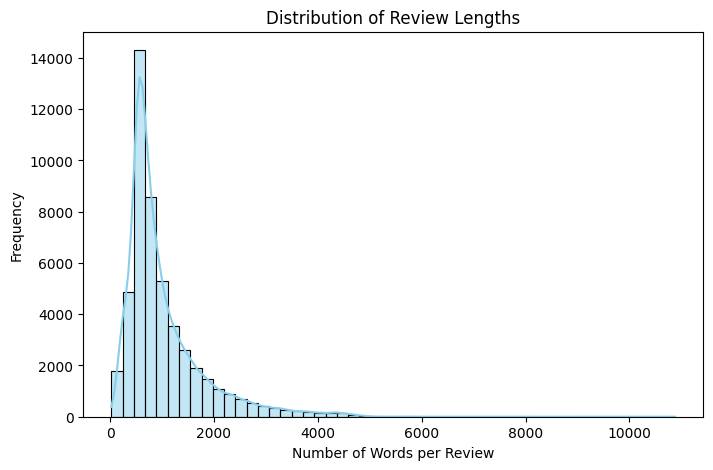

In [ ]:
plt.figure(figsize=(8,5))
sb.histplot(imdb_data['review_length'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words per Review")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-322654095.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='sentiment', y='review_length', data=imdb_data, palette='coolwarm')


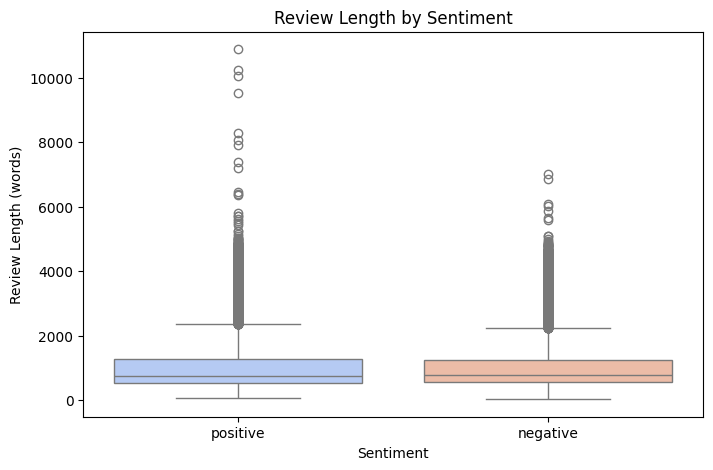

In [ ]:
plt.figure(figsize=(8,5))
sb.boxplot(x='sentiment', y='review_length', data=imdb_data, palette='coolwarm')
plt.title("Review Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Review Length (words)")
plt.show()


## DATA PREPROCESSING

* Lowercasing words
* removing html tags
* removing any puctuation and symbols
* removing unnecessay words lie a, an , the

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


# we are gonna define a function which will clean the text

def clean_text(text):

  #lower casing the words
  text = text.lower()

  # removing html tag
  text = re.sub(r'<.*?>','',text)

  # removing punctuation, number and special symbols
  text = re.sub(r'[^a-z\s]','',text)

  # removing stopwords
  tokens = text.split()
  tokens = [word for word in tokens if word not in stop_words]

  #joining back from token to text
  cleaned_text = ' '.join(tokens)

  return cleaned_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
imdb_data['cleaned_review'] = imdb_data['review'].apply(clean_text)

imdb_data.head()

/tmp/ipython-input-2371221191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_data['cleaned_review'] = imdb_data['review'].apply(clean_text)


,review,sentiment,review_length,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,1377,one reviewers mentioned watching oz episode yo...
1,A wonderful little production. <br /><br />The...,positive,793,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,721,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,569,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1032,petter matteis love time money visually stunni...


In [ ]:
imdb_data['cleaned_review_length'] = imdb_data['cleaned_review'].apply(lambda x : len(re.findall(r'\w', str(x))))
imdb_data.head()

/tmp/ipython-input-1609579413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_data['cleaned_review_length'] = imdb_data['cleaned_review'].apply(lambda x : len(re.findall(r'\w', str(x))))


,review,sentiment,review_length,cleaned_review,cleaned_review_length
0,One of the other reviewers has mentioned that ...,positive,1377,one reviewers mentioned watching oz episode yo...,991
1,A wonderful little production. <br /><br />The...,positive,793,wonderful little production filming technique ...,573
2,I thought this was a wonderful way to spend ti...,positive,721,thought wonderful way spend time hot summer we...,503
3,Basically there's a family where a little boy ...,negative,569,basically theres family little boy jake thinks...,391
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1032,petter matteis love time money visually stunni...,739


In [ ]:
cleaned_imdb_data = imdb_data[['cleaned_review', 'cleaned_review_length','sentiment']]

cleaned_imdb_data.head()

,cleaned_review,cleaned_review_length,sentiment
0,one reviewers mentioned watching oz episode yo...,991,positive
1,wonderful little production filming technique ...,573,positive
2,thought wonderful way spend time hot summer we...,503,positive
3,basically theres family little boy jake thinks...,391,negative
4,petter matteis love time money visually stunni...,739,positive


## TRAIN-TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

x = cleaned_imdb_data['cleaned_review']
y = cleaned_imdb_data['sentiment']

# changing the label into number
y = y.map({'positive':1, 'negative':0})

#splitting the data
x_train, x_test,  y_train, y_test = train_test_split(x,y,test_size=0.2 ,stratify = y ,random_state= 42)

#checking the length
print("total samples", len(cleaned_imdb_data))
print("total training data", len(x_train))
print("total testing data", len(x_test))




total samples 49582
total training data 39665
total testing data 9917


In [ ]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

,proportion
sentiment,
1,0.501865
0,0.498135


### FEATURE EXTRACTION

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
# initiate the tokeniser
MAX_WORD = 10000

#create tokeniser
tokenizer = Tokenizer(num_words=MAX_WORD, oov_token='<oov>') #handles oov(out of vocabulary)

#fit tokenizer in training set
tokenizer.fit_on_texts(x_train)

In [ ]:
#converting text into sequence
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

In [ ]:
#now we pad sequence to make equal length for all text
#setting max sequnce length
MAX_SEQ_LENGTH  = 200

#padding sequmces so that all have same length
x_train_padded = pad_sequences(x_train_seq, maxlen=MAX_SEQ_LENGTH, padding = 'post', truncating= 'post')
x_test_padded = pad_sequences(x_test_seq, maxlen= MAX_SEQ_LENGTH, padding = 'post', truncating= 'post')

x_train_padded.shape, x_test_padded.shape

((39665, 200), (9917, 200))

In [ ]:
from tensorflow.keras import layers, models , optimizers
from tensorflow.keras.callbacks import EarlyStopping


EMBEDDING_DIM = 128

model = models.Sequential([
    layers.Embedding(input_dim = MAX_WORD, output_dim = EMBEDDING_DIM ),
    layers.Bidirectional(layers.LSTM(64,return_sequences = False, dropout=0.3, recurrent_dropout= 0.3)),
    layers.Dense(64, activation= 'relu'),
    layers.Dense(1, activation= 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor = 'val_loss', patience = 2, restore_best_weights=True)

history = model.fit(
    x_train_padded, y_train,
    validation_split=0.2,
    epochs = 10,
    batch_size = 64,
    callbacks = [early_stop],
    verbose = 1
)

model.summary()

Epoch 1/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 344s 675ms/step - accuracy: 0.7106 - loss: 0.5426 - val_accuracy: 0.8675 - val_loss: 0.3486
Epoch 2/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 374s 660ms/step - accuracy: 0.8649 - loss: 0.3427 - val_accuracy: 0.8456 - val_loss: 0.3606
Epoch 3/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 381s 659ms/step - accuracy: 0.8873 - loss: 0.2895 - val_accuracy: 0.8741 - val_loss: 0.3181
Epoch 4/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 334s 673ms/step - accuracy: 0.9126 - loss: 0.2366 - val_accuracy: 0.8663 - val_loss: 0.3449
Epoch 5/10
496/496 ━━━━━━━━━━━━━━━━━━━━ 376s 660ms/step - accuracy: 0.9267 - loss: 0.1975 - val_accuracy: 0.8670 - val_loss: 0.3665


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_9 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,161,413 (15.87 MB)

 Trainable params: 1,387,137 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,774,276 (10.58 MB)

In [ ]:
test_loss , test_accuracy = model.evaluate(x_test_padded,y_test)
print(f'test loss : {test_loss:.2f}')
print(f'test accuracy : {test_accuracy:.2f}')

310/310 ━━━━━━━━━━━━━━━━━━━━ 28s 91ms/step - accuracy: 0.8784 - loss: 0.3095
test loss : 0.32
test accuracy : 0.87


##PREDICTING THE SENTIMENT BY DYNAMIC REVIEW

In [ ]:
import pickle

model.save('imdb_model.h5')

with open("tokenizer.pkl","wb") as f:
  pickle.dump(tokenizer, f)

In [ ]:
#preprocess a new review

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

MAX_SEQ_LENGTH = 200


def preprocess_text(text):
  #making text lowercase
  text = text.lower()

  #removing html tags
  text = re.sub(r'<.*?',' ',text)

  #removing punctuation, numbers and symbols
  text = re.sub(r'[^a-z\s]', ' ', text)

  #removing stop words
  tokens = text.split()
  tokens = [word for word in tokens if word not in stop_words]

  #lemmatizing
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(word) for word in tokens]

  #join back
  clean_text = ' '.join(tokens)

  return clean_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def prepare_input(text):
  cleaned= preprocess_text(text)
  seq = tokenizer.texts_to_sequences([cleaned])
  padded = pad_sequences(seq, maxlen=MAX_SEQ_LENGTH, padding='post', truncating='post')
  return padded

In [ ]:
#now we are gonna predict the value

new_review = "I honestly can’t remember the last time I wanted to leave a theater this badly. The plot feels like it was stitched together from clichés, the acting is wooden, and the soundtrack is louder than necessary. Avoid this at all costs—unless you have a thing for wasted two hours."


input_seq = prepare_input(new_review)

pred_prob = model.predict(input_seq)[0][0]
sentiment = "positive" if pred_prob >= 0.5 else "negative"

print(f"Review: {new_review}")
print(f"Predicted Sentiment: {sentiment} (Probability: {pred_prob:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
Review: I honestly can’t remember the last time I wanted to leave a theater this badly. The plot feels like it was stitched together from clichés, the acting is wooden, and the soundtrack is louder than necessary. Avoid this at all costs—unless you have a thing for wasted two hours.
Predicted Sentiment: negative (Probability: 0.04)
